C:\Users\Tomas\AppData\Local\Temp\ipykernel_23180\1380169475.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mn = df[c].sub(player_group.transform('mean'))


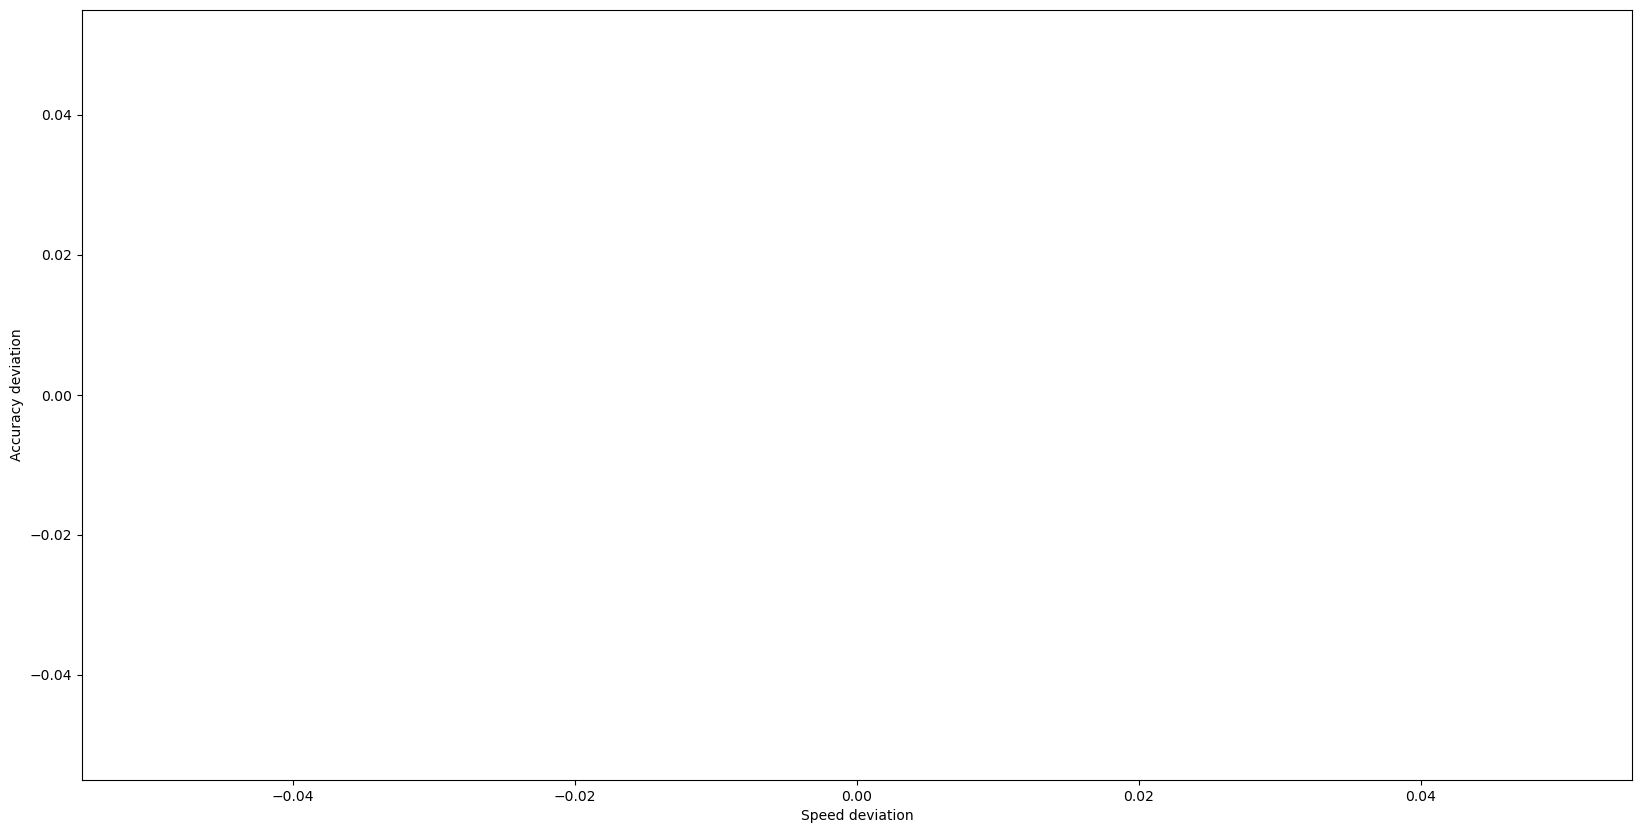

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import parsing
import scraper
import pandas as pd

def zerozero(): return (0,0)
df = scraper.load_mined()
plt.rcParams["figure.figsize"] = (20,10)
df[['wpm','match','pos']] = df[['wpm','match','pos']].astype('int32')
df[['player']] = df[['player']].astype('string')
df:pd.DataFrame = df
#print(df.columns)
c = ['wpm','acc']
player_group = df.groupby('player')[c]
mn = df[c].sub(player_group.transform('mean'))
md = mn.add_suffix('_md')
#df[['player',"wpm", "acc"]].join(md)
#sb.relplot(md,x='wpm_md',y='acc_md')
ax = sb.regplot(md,x='wpm_md',y='acc_md',marker="+",
                    scatter_kws={"color": "black"}, line_kws={"color": "red"})
_ = ax.set(xlabel='Speed deviation', ylabel='Accuracy deviation')


https://stackoverflow.com/questions/33490833/display-regression-equation-in-seaborn-regplot

deviation of accuracy and deviation of wpm are strongly positively correlated
=> the less mistakes, the less time wasted repairing them

todo: avg time lost per mistake 

## Accuracy deviation

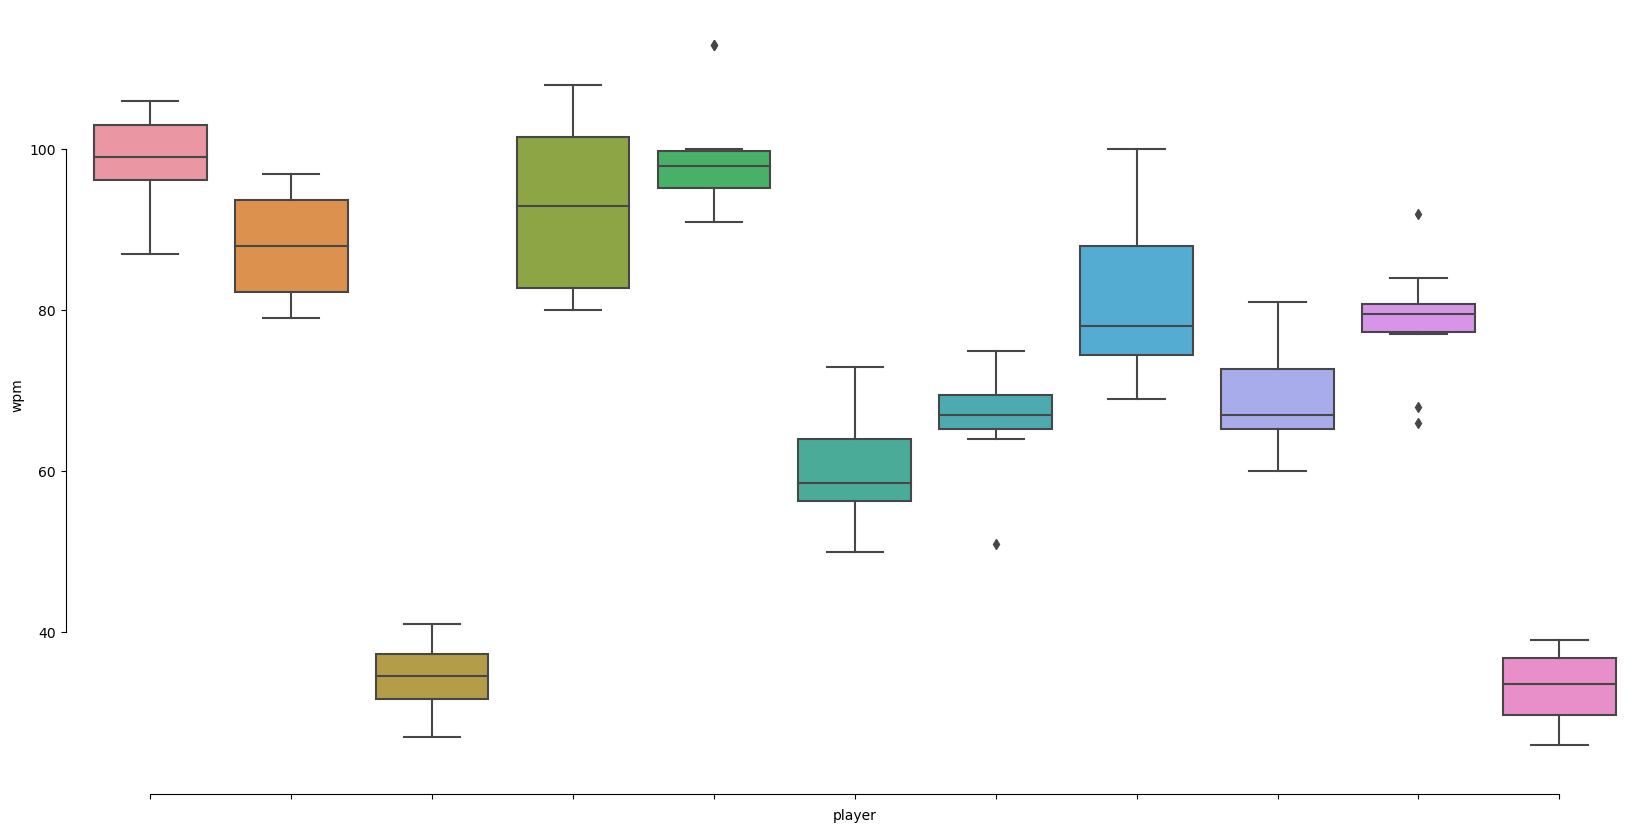

In [2]:
pl = sb.boxplot(x="player", y="wpm",data=df.head(100))
pl.set(xticklabels=[])
sb.despine(offset=10, trim=True)

some players are more consistent than others

## WPM deviation

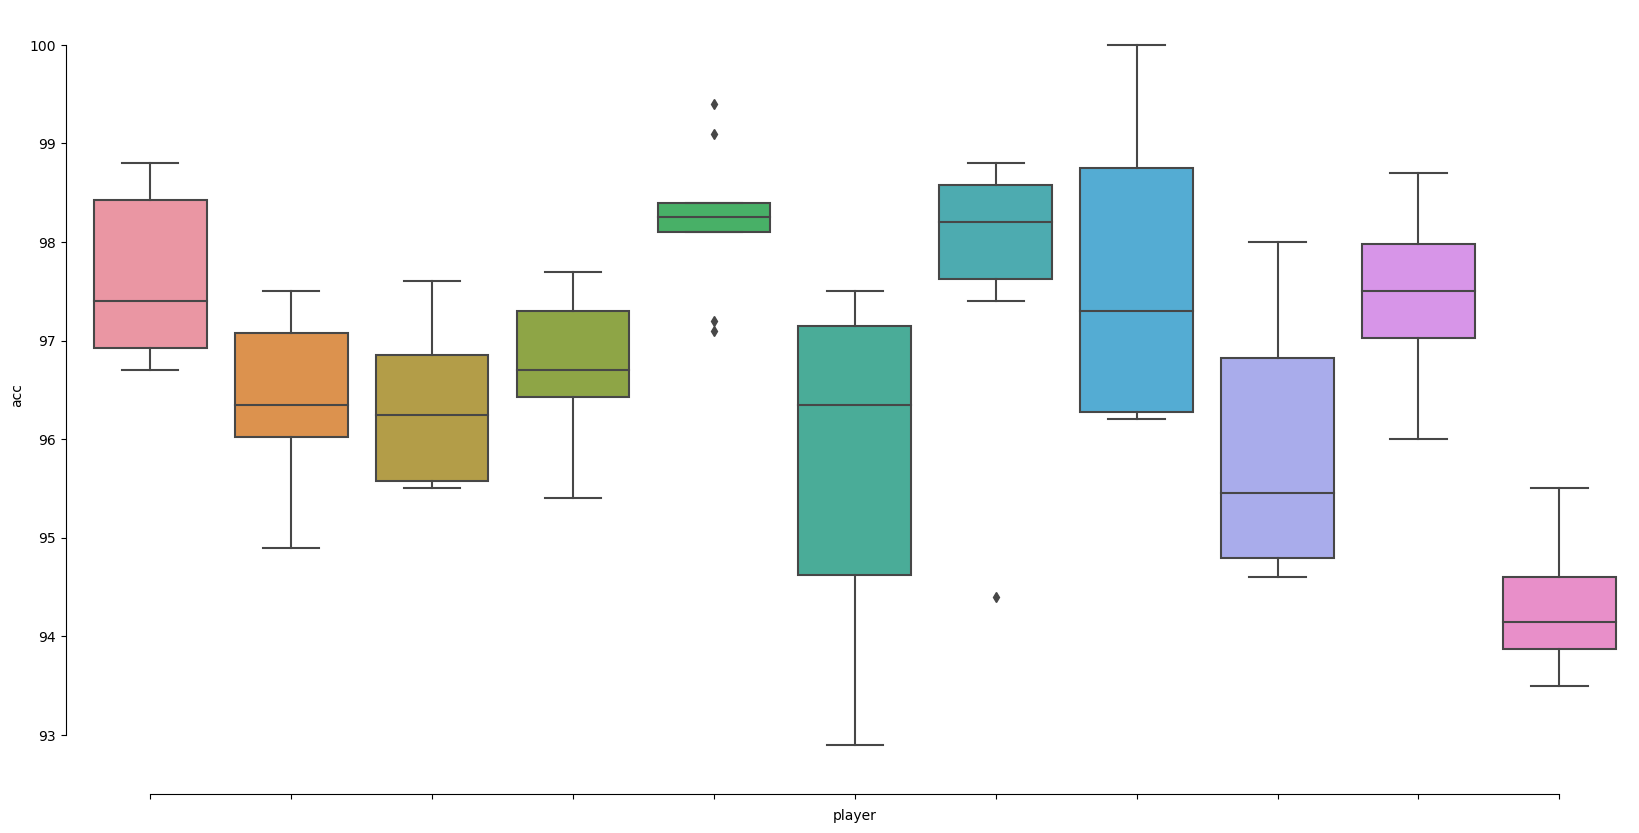

In [3]:
pl = sb.boxplot(x="player", y="acc",data=df.head(100))
pl.set(xticklabels=[])
sb.despine(offset=10, trim=True)

some players are more consistent than others
higher fluctuations than in accuracy

Keyboard usage heatmap

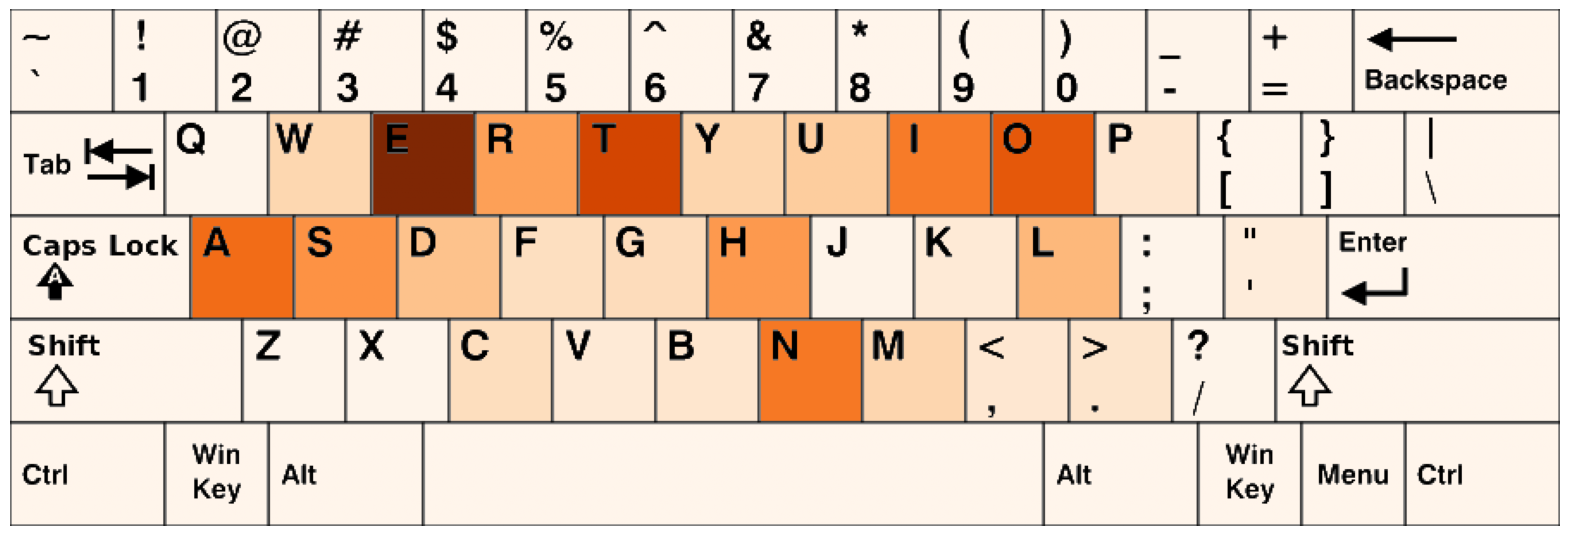

In [4]:
import keyboard
keyboard.show_heatmap(key_freq,keyboard.extract_occurances)

[Text(24.00000000000002, 0.5, 'frequency'), Text(0.5, 24.0, 'char')]

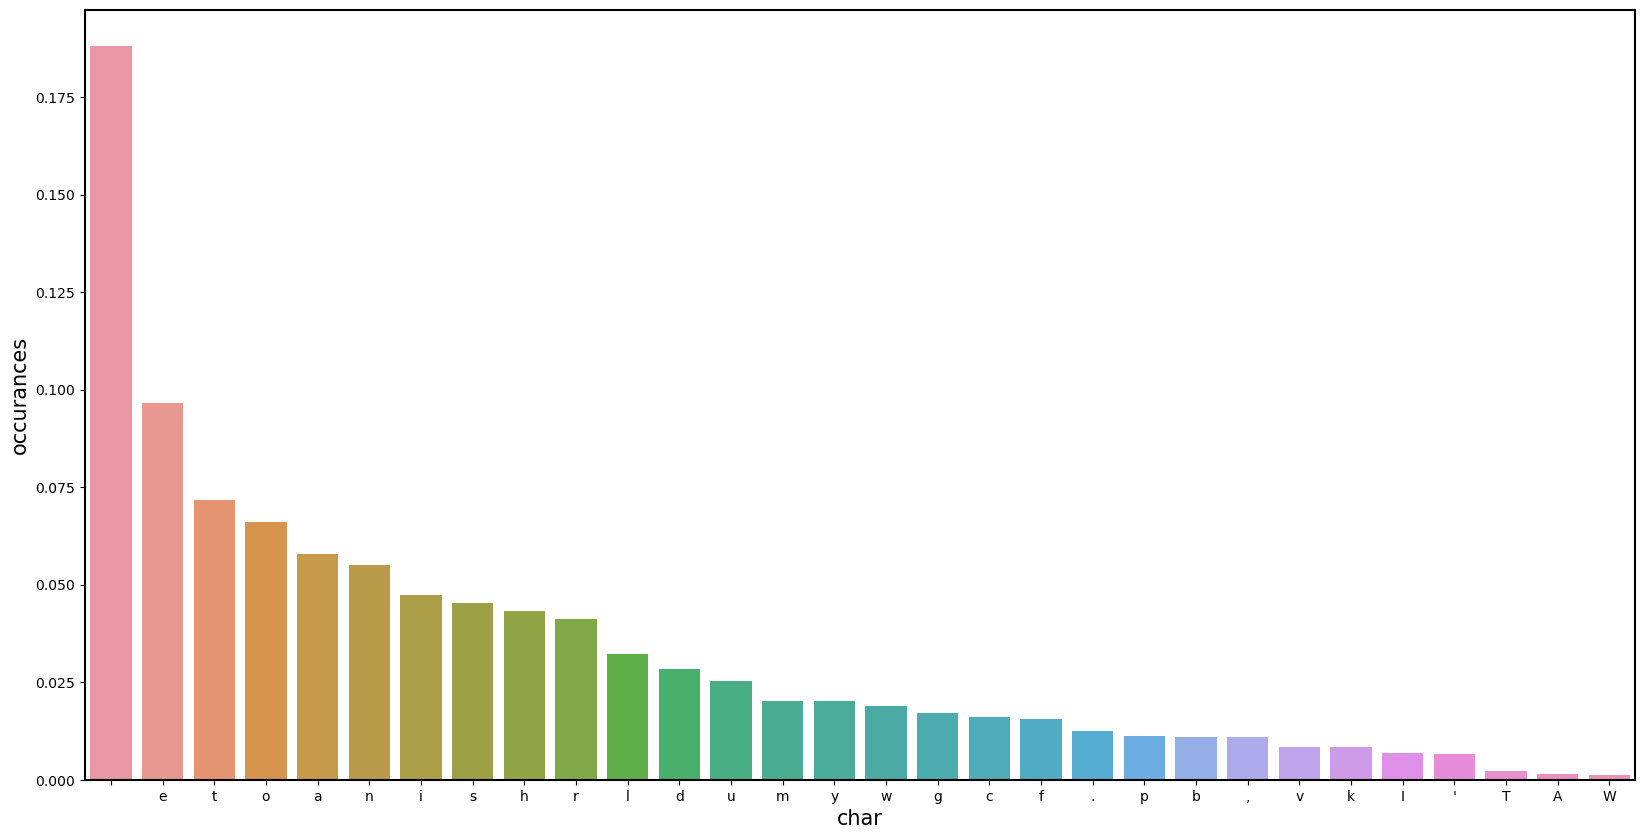

In [5]:
arr = list(map(lambda item:(item[0],item[1][0],item[1][1]),key_freq.items()))
df=pd.DataFrame(arr,columns=['char','occurances','avg_latency'])
s= df['occurances'].sum()
df['occurances'] = df['occurances']/s
df = df.sort_values('occurances',ascending=False)
sb.barplot(df.head(30),x='char',y='occurances')
ax.set(xlabel='char', ylabel='frequency')

approximates the distributions of letters in english texts

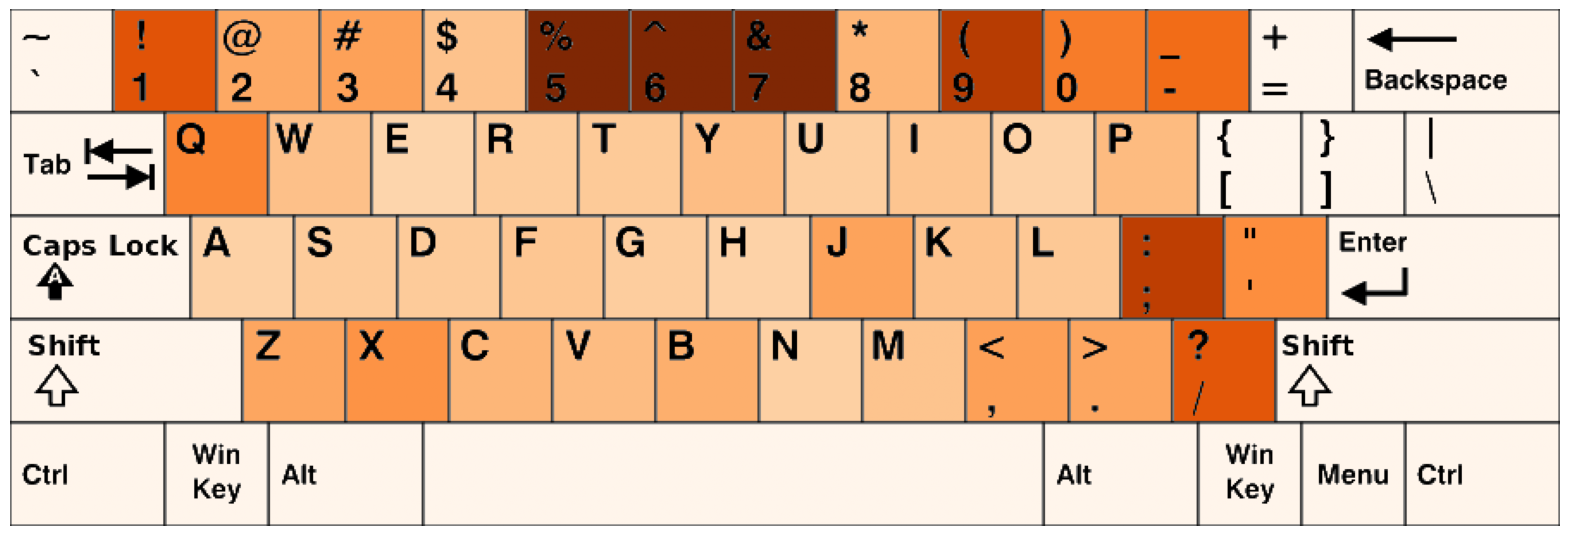

In [7]:
import keyboard
import numpy as np
ext = lambda a,b: keyboard.extract_avg_latency(key_freq,a,b)
keyboard.show_heatmap(ext,normalise_f = keyboard.interval_clip)


potentially correlation between frequency and latency(todo: normalise by position)
=> muscle memory = players have 

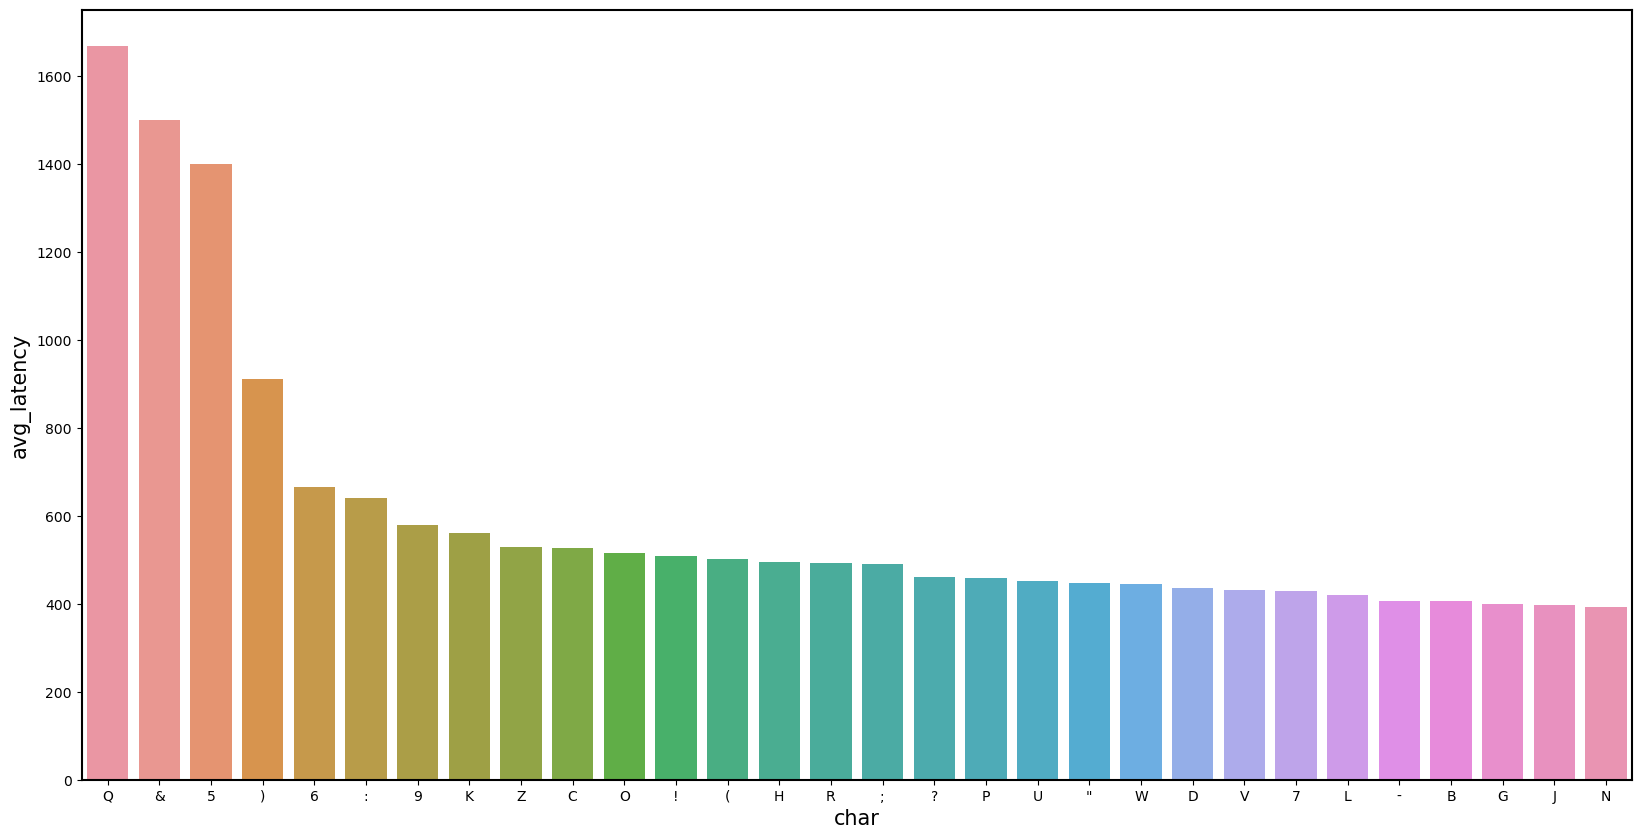

In [ ]:
arr = list(map(lambda item:(item[0],item[1][0],item[1][1]),key_freq.items()))
df=pd.DataFrame(arr,columns=['char','occurances','avg_latency'])
df = df[df['occurances']>1].sort_values('avg_latency',ascending=False)
sb.barplot(df.head(30),x='char',y='avg_latency')